In [11]:
import collections
from pathlib import Path
from typing import TYPE_CHECKING, Any, Callable, Literal, TypeVar

import matplotlib.pyplot as plt
import numpy as np
import numpy.typing as npt
from numpy.typing import NDArray


import knn
import linreg
import preprocess
import utils


2. Digit Classification with KNN:


In [12]:
X: NDArray[np.float64] = np.loadtxt("data/MNIST-5-6-Subset/MNIST-5-6-Subset.txt")
y: NDArray[np.float64] = np.loadtxt("data/MNIST-5-6-Subset/MNIST-5-6-Subset-Labels.txt")
lx: NDArray[np.float64] = np.loadtxt("data/MNIST-5-6-Subset/MNIST-5-6-Subset-Light-Corruption.txt")
mx: NDArray[np.float64] = np.loadtxt("data/MNIST-5-6-Subset/MNIST-5-6-Subset-Moderate-Corruption.txt")
hx: NDArray[np.float64] = np.loadtxt("data/MNIST-5-6-Subset/MNIST-5-6-Subset-Heavy-Corruption.txt")


# plt.imshow(X[:,0].reshape((28,28)).T)
# plt.imshow(X_train[:,1].reshape((28,28)))


Task 1:


In [13]:
from numpy import ndarray

def KNNdriver(
    Xval: npt.ArrayLike,
    yval: npt.ArrayLike,
    Xt_val: npt.ArrayLike,
    yt_val: npt.ArrayLike,
    k: int,
) -> None:

    verror = []
    var_val = []

    K: NDArray[np.signedinteger[Any]] = np.arange(1, k + 1, 1)
    b = False
    if type(Xval) is list:
        b = True
    for l in range(4):
        if b:
            Xtrain: NDArray[Any] = np.asanyarray(Xval[l])
            Ytrain: NDArray[Any] = np.asanyarray(yval[l])
        else:
            Xtrain = np.asanyarray(Xval)
            Ytrain = np.asanyarray(yval)
        vx: NDArray[Any] = np.asanyarray(Xt_val[l])
        vy: NDArray[Any] = np.asanyarray(yt_val[l])

        val_errors = []
        for i in range(5):
            n: int = len(vx[i].T)
            errors = []

            for k in K:

                model = knn.KNN(k)

                model.fit(Xtrain, Ytrain)
                predictions = []
                for j in range(n):
                    preds = np.asanyarray(vx[i][:, j])
                    predictions.append(model.predict(preds))

                acc: float = model.accuracy(vy[i], predictions)
                err: float = model.error(vy[i], predictions)

                errors.append(err)
            val_errors.append(errors)
        verror.append(val_errors)
        val_var = np.var(val_errors, axis=0)
        var_val.append(val_var)
    print(type(Xval),b)
    utils.plot_var(K, var_val, 4, b)
    utils.plot_error(K, verror, 4, 5,b)


In [14]:
N: list[int] = [10, 20, 40, 80]
n: Literal[80] = 80
K: Literal[50] = 50

(
    X_train,
    y_train,
    svals_x,
    svals_y,
    Xtrain_values,
    ytrain_values,
    Xtest_values,
    ytest_values,
) = preprocess.knn_data(X, y, lx, mx, hx, n, N)


<class 'numpy.ndarray'> False


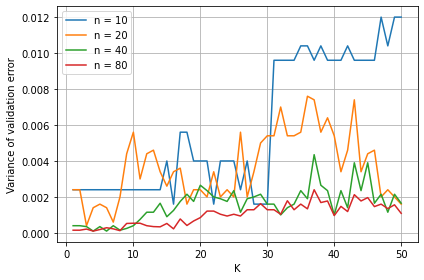

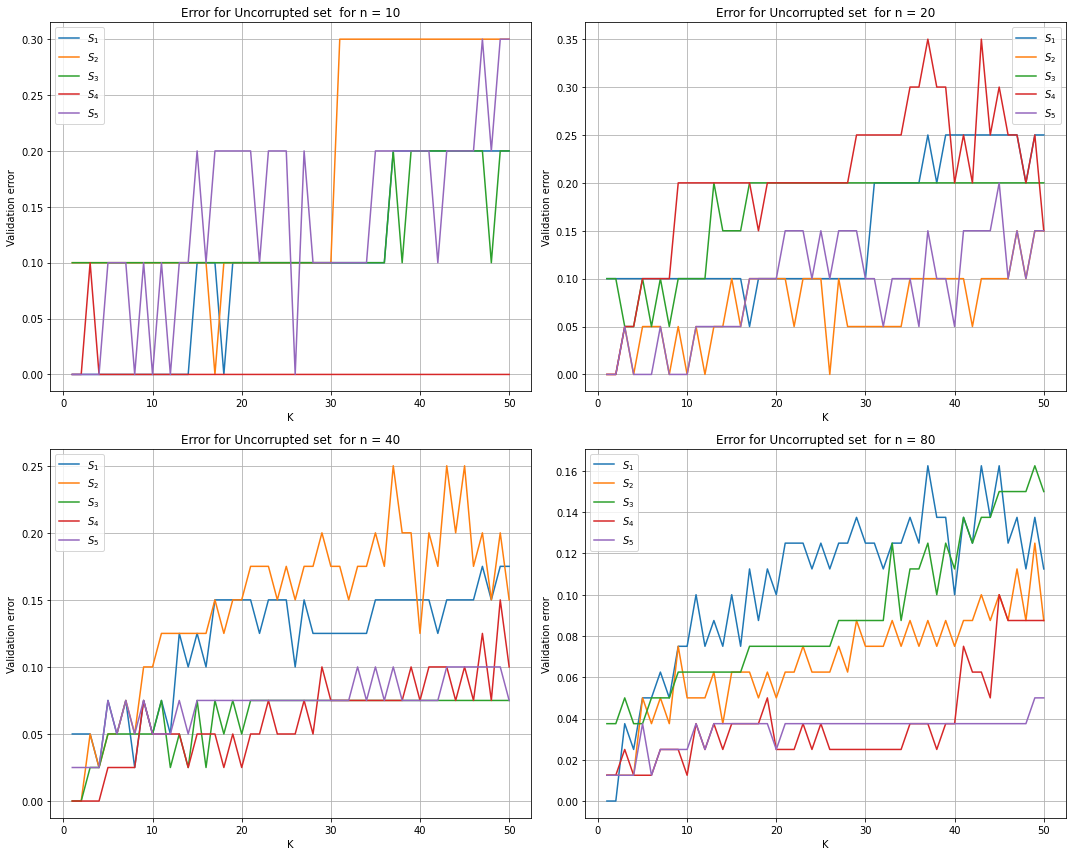

In [15]:
KNNdriver(X_train, y_train, svals_x, svals_y, K)
# %load_ext line_profiler
# %lprun KNNdriver(X_train,y_train,svals_x,svals_y,K)

Task 2:


<class 'list'> True


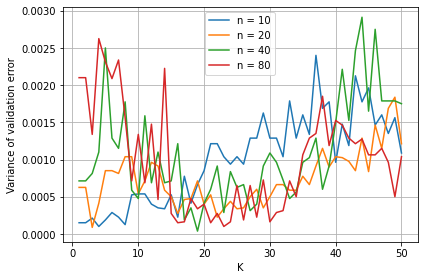

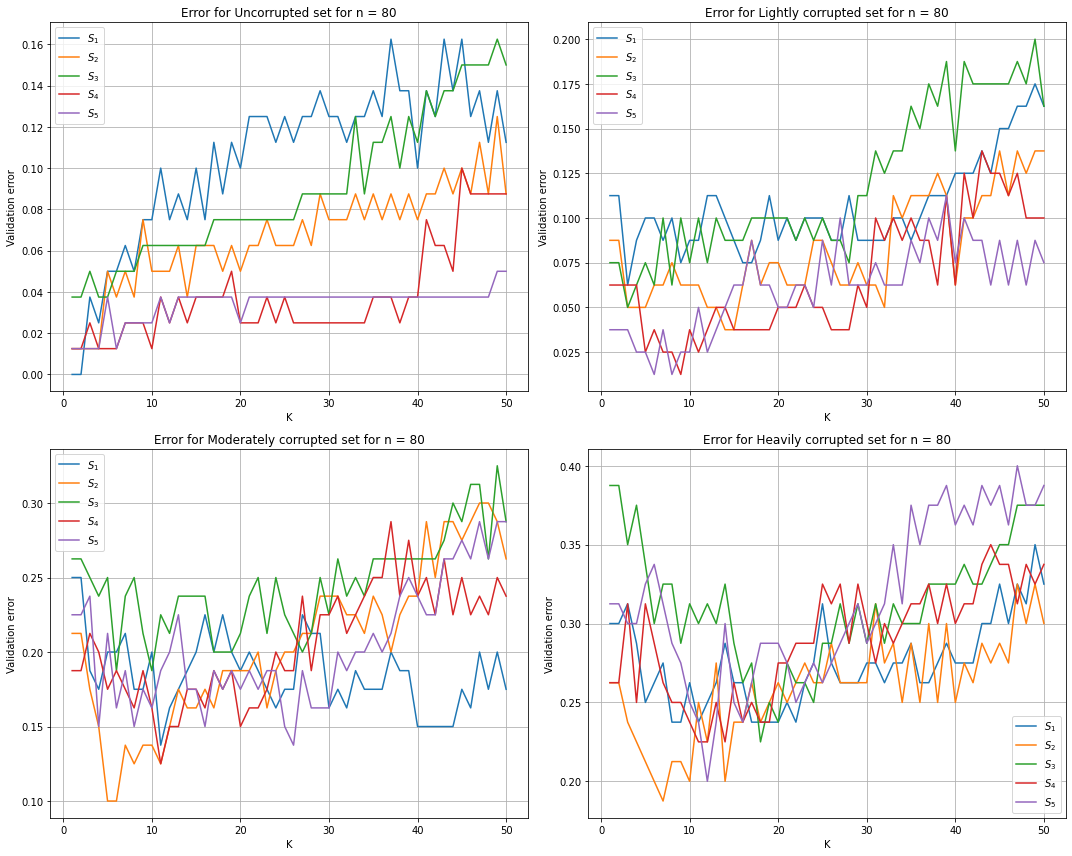

In [16]:
KNNdriver(Xtrain_values, ytrain_values, Xtest_values, ytest_values, K)


Linear Regression


2. Construct data set S'. Build the model, and report the two parameters of the model as well as the
   mean-squared-error of the model h computed over the training data set S.


In [17]:
data: NDArray[np.float64] = np.loadtxt("data/PCB.dt")
X = np.asanyarray(data[:, 0])
y = np.asanyarray(data[:, 1])


# Constructing data set S'
S_prime: NDArray[np.float64] = data.copy()
S_prime[:, 1] = np.log(S_prime[:, 1])
y_ln: ndarray[Any, np.dtype[np.float64]] = S_prime[:, 1]

# Fiting the model  h'(x) = ax+b to S'.
model = linreg.LinearRegression()
model.fit(X, y_ln)
b, a = model.w

print("Paramters obtained by linear regression: ")
print("a: %f, b: %f" % (a, b))


print("MSE of h(x) is: %f" % utils.MSE(X, y, utils.h, a, b))


Paramters obtained by linear regression: 
a: 0.259128, b: 0.031472
MSE of h(x) is: 34.835561


3. Plot the data and the model output. The plot must have proper axis labels
   and a legend. In all plots in this assignment, plot the logarithm of the PCB
   concentration versus the (not transformed) age.


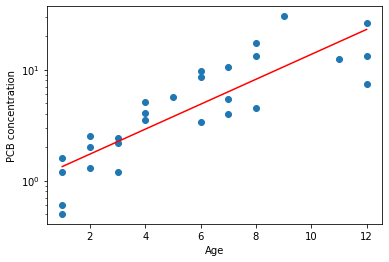

In [18]:
plt.figure()
utils.plot_reg(X, y, utils.h, a, b, True)


4. Compute the coefficient of determination R2.


In [19]:
print("R2 score: %f" % utils.R2_score(X, y, utils.h, a, b))


R2 score: 0.357014


5. Build nonlinear model exp(a \* sqrt(x) + b) and report the mean-squared error.

Then plot the target (on log scale) and the model out over the original inputs (linear scale), i.e. the unit of the x-axis should be years. Finally, compute the R2 for the new model and the transformed labels.


Paramters obtained by linear regression: 
a: 1.198606, b: -1.194751
MSE:  28.08439017494436
R2 score: 0.481625


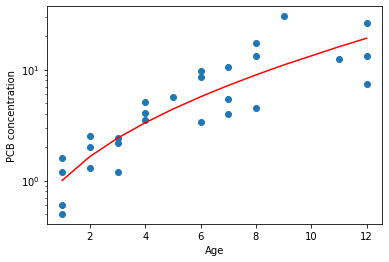

In [20]:
model = linreg.LinearRegression()
model.fit(np.sqrt(X), y_ln)
b, a = model.w
print("Paramters obtained by linear regression: ")
print("a: %f, b: %f" % (a, b))
print("MSE: ", utils.MSE(X, y, utils.h_nonlin, a, b))

plt.figure()
utils.plot_reg(X, y, utils.h_nonlin, a, b, True)

print("R2 score: %f" % utils.R2_score(X, y, utils.h_nonlin, a, b))
